In [1]:
from gensim.models import Word2Vec
import logging

logging.basicConfig(level=logging.INFO)

In [6]:
model = Word2Vec.load('trained_model/phrases.model')
pos_tag_model = Word2Vec.load('trained_model/POS_TAG_wiki_corpus.model')

INFO:gensim.utils:loading Word2Vec object from trained_model/phrases.model
INFO:gensim.utils:loading wv recursively from trained_model/phrases.model.wv.* with mmap=None
INFO:gensim.utils:loading vectors from trained_model/phrases.model.wv.vectors.npy with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:loading vocabulary recursively from trained_model/phrases.model.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from trained_model/phrases.model.trainables.* with mmap=None
INFO:gensim.utils:loading syn1neg from trained_model/phrases.model.trainables.syn1neg.npy with mmap=None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded trained_model/phrases.model
INFO:gensim.utils:loading Word2Vec object from trained_model/POS_TAG_wiki_corpus.model
INFO:gensim.utils:loading wv recursively from trained_model/POS_TAG_wiki_corpus.model.wv.* with mmap=None
INFO:gensim.utils:loading vectors fr

In [45]:
model.wv.most_similar("san_francisco")

[('los_angeles', 0.7319003343582153),
 ('san_diego', 0.707737147808075),
 ('seattle', 0.6972737312316895),
 ('miami', 0.65841144323349),
 ('chicago', 0.657082200050354),
 ('oakland', 0.6510159969329834),
 ('philadelphia', 0.6488163471221924),
 ('minneapolis', 0.6464691162109375),
 ('new_york', 0.6419083476066589),
 ('boston', 0.6366688013076782)]

In [2]:
word2vec_model = Word2Vec.load('trained_model/clean_enwiki_11.model')


INFO:gensim.utils:loading Word2Vec object from trained_model/clean_enwiki_11.model
INFO:gensim.utils:loading wv recursively from trained_model/clean_enwiki_11.model.wv.* with mmap=None
INFO:gensim.utils:loading vectors from trained_model/clean_enwiki_11.model.wv.vectors.npy with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:loading vocabulary recursively from trained_model/clean_enwiki_11.model.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from trained_model/clean_enwiki_11.model.trainables.* with mmap=None
INFO:gensim.utils:loading syn1neg from trained_model/clean_enwiki_11.model.trainables.syn1neg.npy with mmap=None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded trained_model/clean_enwiki_11.model


In [14]:
word2vec_model.wv.most_similar("king")

[('prince', 0.6631728410720825),
 ('ruler', 0.6257941722869873),
 ('monarch', 0.6120851635932922),
 ('queen', 0.6077297329902649),
 ('throne', 0.6058080792427063),
 ('ã\x86thelstan', 0.5935417413711548),
 ('pharaoh', 0.5594269037246704),
 ('vassal', 0.559334397315979),
 ('emperor', 0.5529524087905884),
 ('charlemagne', 0.5519390106201172)]

In [9]:
word2vec_model.wv.distance("king", "queen")

0.3922702670097351

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 200), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

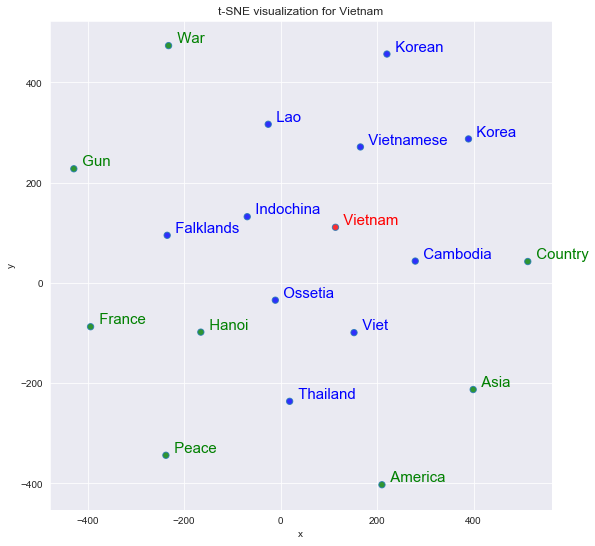

In [23]:
tsnescatterplot(word2vec_model, 'vietnam', ['hanoi', 'asia', 'country', 'war', 'france', 'america', 'gun', 'peace'])